In [261]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [262]:
from RNA_helper import get_puzzle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [579]:
# 1, 41, 84
puzzle_idx=41
objective_structure, sequence, puzzle_name = get_puzzle(idx=puzzle_idx, return_name=True, verbose=False)
len(objective_structure)

116

In [580]:
features_dim = 512
EMBEDDING_DIM = 3
metric = 'combined'
# metric = None
model_name = puzzle_name.lower().replace(' ', '_') + f'_{features_dim}_{EMBEDDING_DIM}'
if metric:
    model_name = model_name + f'_{metric}'
model_name

'runner_512_3_combined'

In [581]:
monitor_file=f'logs/{model_name}/0.monitor.csv'
solutions_filename = f'solved_puzzles/{model_name}.txt'

In [582]:
monitor_file, solutions_filename

('logs/runner_512_3_combined/0.monitor.csv',
 'solved_puzzles/runner_512_3_combined.txt')

In [583]:
df = pd.read_csv(monitor_file, header=1)
len(df)

13312

In [584]:
df['delta_free_obj'] = -(df['energy_to_objective'] - df['free_energy'])**2

In [585]:
numeric_columns = ['free_energy', 'structure_distance', 'energy_to_objective', 'energy_reward', 'distance_reward', 'delta_free_obj']
def plot_data(df, numeric_columns=numeric_columns, N=1024):
    avrg_columns = df[numeric_columns].values.reshape(-1, N, len(numeric_columns)).mean(axis=1)
    f, ax = plt.subplots(2, 3, figsize=(30, 12), sharex=True)
    ax = ax.reshape(-1)

    for i, name in enumerate(numeric_columns):
        ax[i].plot(avrg_columns[:, i])
        ax[i].set_title(name)

    f.suptitle(puzzle_name, fontsize=24)
    plt.show()
    return avrg_columns

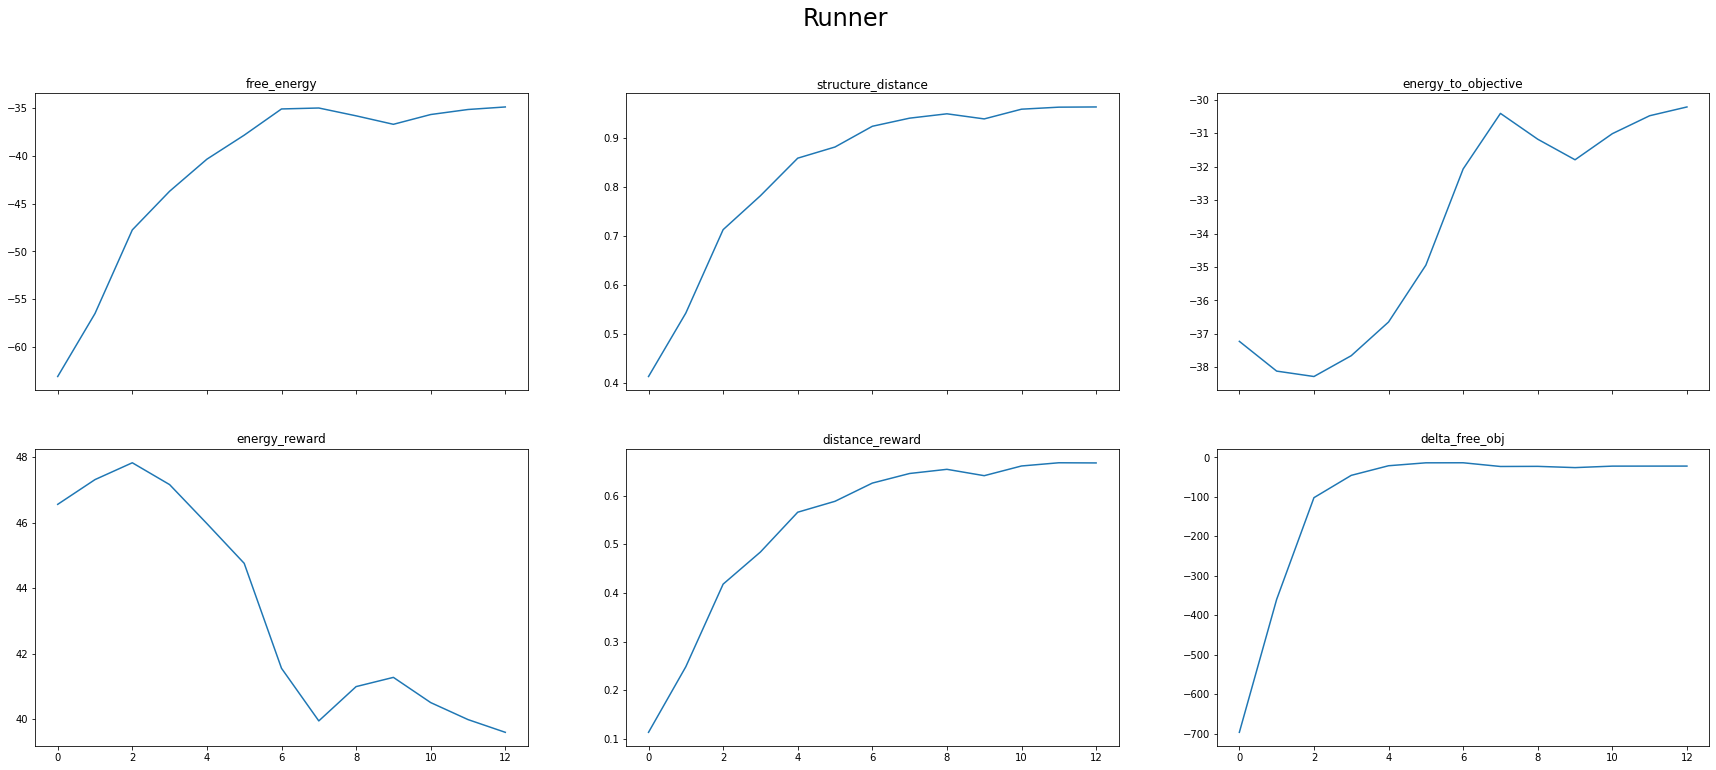

In [586]:
avrg_columns = plot_data(df)

In [587]:
avrg_columns[:, 1].max(), avrg_columns[:, 5].max()

(0.9637142319277106, -13.515195317791676)

# Solutions

In [588]:
import RNA

In [589]:
f = open(solutions_filename)
sequences = [s.strip() for s in f.readlines()]
f.close()

In [590]:
len(sequences)

1597

In [591]:
energies = [RNA.fold(s) for s in sequences]

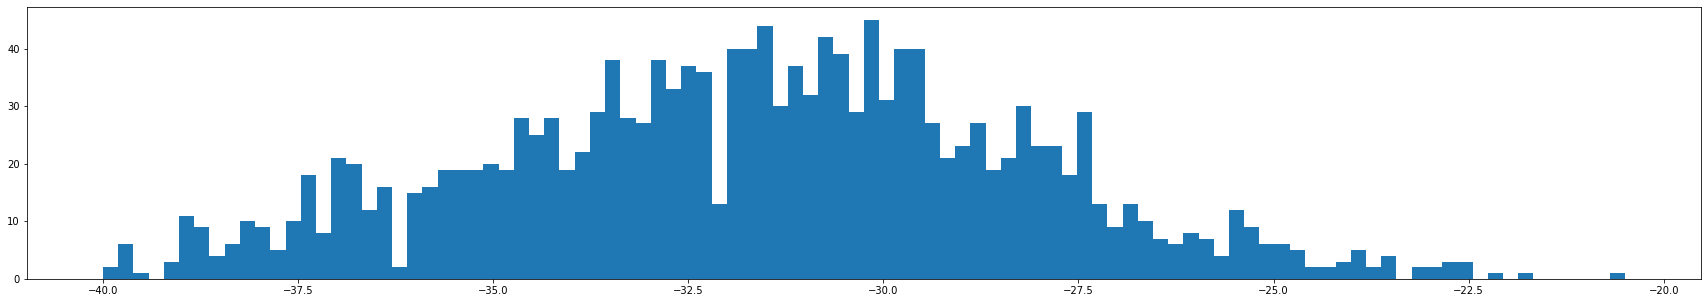

In [592]:
plt.figure(figsize=(30,5))
_ = plt.hist(np.array(energies)[:, 1].astype(float), bins=100, orientation='vertical')

In [544]:
# plt.hist(sequences)

In [385]:
for s in sequences:
    struct, en = RNA.fold(s)
    if struct != objective_structure:
        print('error')
    print(en)

-36.900001525878906
-37.400001525878906
-36.099998474121094
-39.79999923706055
-38.599998474121094
-37.29999923706055
-38.20000076293945
-37.400001525878906
-36.400001525878906
-37.70000076293945
-33.900001525878906
-39.0
-37.400001525878906
-37.29999923706055
-37.29999923706055
-36.400001525878906
-38.29999923706055
-35.70000076293945
-39.79999923706055
-39.099998474121094
-35.79999923706055
-39.70000076293945
-39.79999923706055
-38.79999923706055
-38.20000076293945
-39.599998474121094
-39.099998474121094
-39.0
-38.79999923706055
-35.599998474121094
-37.5
-38.29999923706055
-36.5
-36.599998474121094
-38.20000076293945
-38.0
-34.599998474121094
-37.599998474121094
-38.29999923706055
-37.0
-36.79999923706055
-35.900001525878906
-39.0
-37.70000076293945
-38.79999923706055
-38.099998474121094
-37.099998474121094
-37.29999923706055
-38.5
-38.20000076293945
-36.5
-39.0
-38.0
-35.79999923706055
-38.20000076293945
-36.900001525878906
-38.79999923706055
-36.099998474121094
-38.099998474121094
